In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import the dataset
os.chdir(r"C:\Users\rober\OneDrive\Documents")
Movies = pd.read_csv("movies_metadata.csv")

# See the number of rows and columns
Movies.shape

C:\Users\rober\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(45466, 24)

In [2]:
# Remove any duplicate rows
Movies = Movies.drop_duplicates()
# Convert budget objects to numbers
Movies['budget'] = pd.to_numeric(Movies['budget'],errors = 'coerce')
# Remove rows with zero in the budget and revenue columns
Movies = Movies[Movies.budget != 0]
Movies = Movies[Movies.revenue != 0]
# Add column for return on investment (ROI)
Movies['ROI'] = (Movies['revenue'] - Movies['budget']) / Movies['budget']
# Remove unnecessary columns
Movies = Movies[['id', 'title', 'ROI', 'overview']]
# Remove rows with missing values
Movies = Movies.dropna() 
# Calculate mean, standard deviation, and basic statistics for ROI
Movies['ROI'].describe()

count    5.370000e+03
mean     5.576298e+03
std      2.170785e+05
min     -9.999995e-01
25%     -2.097625e-01
50%      1.059925e+00
75%      3.253283e+00
max      1.239638e+07
Name: ROI, dtype: float64

In [3]:
# Top ten movies with the highest ROI
MoviesH = Movies.sort_values(by='ROI', ascending=False)
MoviesH.head(10)

,id,title,ROI,overview
4000,13703,Less Than Zero,1.239638e+07,A college freshman returns to Los Angeles for ...
3342,3082,Modern Times,8.499999e+06,The Tramp struggles to live in modern industri...
14372,14968,Welcome to Dongmakgol,4.197476e+06,"Based on the long running play by Jang Jin, th..."
22278,114903,Aquí Entre Nos,2.755583e+06,"Rodolfo Guerra, father of three daughters, wak..."
2308,8856,"The Karate Kid, Part II",1.018618e+06,Mr. Miyagi and Daniel take a trip to Okinawa t...
25989,78383,Nurse 3-D,9.999990e+05,"Abby Russell, a beautiful, dedicated nurse wit..."
16664,50217,From Prada to Nada,2.688072e+04,A whimsical fish-out-of-water story of two spo...
14192,23827,Paranormal Activity,1.288939e+04,"After a young, middle class couple moves into ..."
8211,1435,Tarnation,5.329339e+03,Filmmaker Jonathan Caouette's documentary on g...
2595,2667,The Blair Witch Project,4.132333e+03,In October of 1994 three student filmmakers di...


In [4]:
# Top ten movies with the lowest ROI
MoviesL = Movies.sort_values(by='ROI', ascending=True)
MoviesL.head(10)

,id,title,ROI,overview
7016,14844,Chasing Liberty,-0.999999,"The President's daughter, unable to experience..."
8107,18475,The Cookout,-0.999999,When Todd Anderson signs a $30 million deal wi...
2663,48781,Never Talk to Strangers,-0.999999,"Sarah Taylor, a police psychologist, meets a m..."
12946,38140,To Rob a Thief,-0.999999,"Emilio, a Colombian con man, arrives in LA wit..."
17527,33927,Deadfall,-0.999998,"After he accidentally kills his father, Mike, ..."
6736,10944,In the Cut,-0.999998,Following the gruesome murder of a young woman...
2882,108346,Dreaming of Joseph Lees,-0.999996,Set in rural England in the 1950s Eva (Samanth...
11918,2196,Death at a Funeral,-0.999995,Chaos ensues when a man tries to expose a dark...
34275,237214,Duniyadari,-0.999992,Duniyadari (Marathi: दुनियादारी) is a 2013 Mar...
11653,41393,Zyzzyx Road,-0.999985,A married man (Leo Grillo) meets a beautiful w...


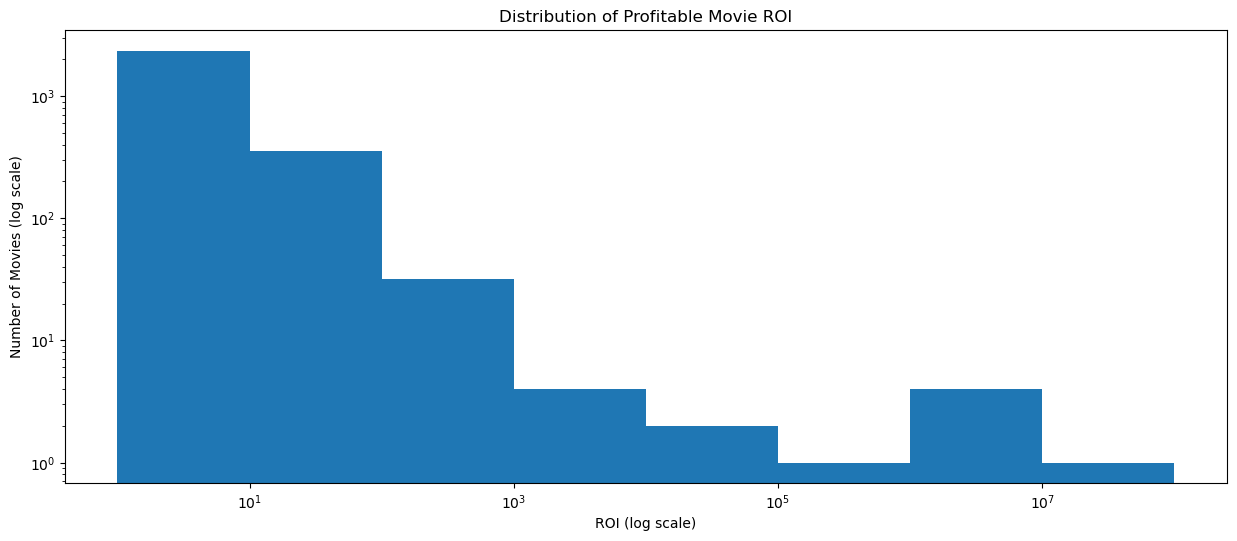

In [5]:
# Distribution of ROI for profitable movies
# Movies with negative ROI cannot be shown because log scales are positive
plt.figure(figsize=(15, 6), dpi=100)
bins = 10**(np.arange(0,9))
plt.xscale('log')
plt.yscale('log')
plt.hist(Movies.ROI, bins = bins)
plt.title("Distribution of Profitable Movie ROI")
plt.xlabel("ROI (log scale)")
plt.ylabel("Number of Movies (log scale)")
plt.show()

In [6]:
# Import Term Frequency-Inverse Document Frequency (tfidf) and k-means functions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# Change overview data to unicode
MoviesU = Movies['overview'].values.astype("U")
# Remove stop words
vectorizer = TfidfVectorizer(stop_words='english')
MoviesX = vectorizer.fit_transform(MoviesU)
# Run K-means model
k = 12
model = KMeans(n_clusters=k, init='k-means++', max_iter=600, n_init=1)
model.fit(MoviesX)

KMeans(max_iter=600, n_clusters=12, n_init=1)

In [7]:
# Add cluster labels to Movies dataset
Movies['cluster'] = model.labels_
Movies.count()

id          5370
title       5370
ROI         5370
overview    5370
cluster     5370
dtype: int64

In [8]:
# Create csv files for each cluster
import io
clusters = Movies.groupby('cluster')
for cluster in clusters.groups:
    f = io.open('cluster'+str(cluster)+ '.csv', 'w', encoding="utf-8") # create csv file
    data = clusters.get_group(cluster)[['title','ROI','overview']] # get data columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

Cluster Centroids and Statistics: 

Cluster 1:
town, small, school, daughter, life, girl, murder, sheriff, city, new, boy, family, 
 Cluster size: 214 movies 
 Mean ROI: 4.49 % 
 Standard deviation: 30.04 %


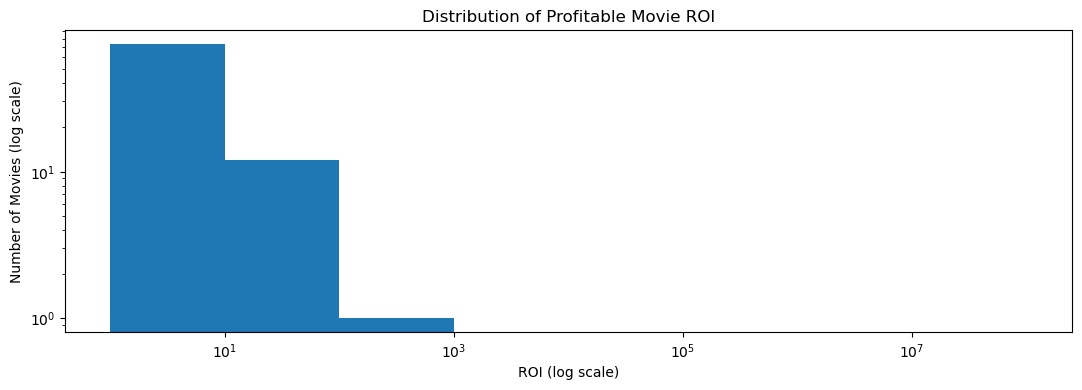

---------------------------------------------------------------------------
Cluster 2:
young, team, story, group, life, american, killer, police, cop, agent, men, evil, 
 Cluster size: 1518 movies 
 Mean ROI: 662.4 % 
 Standard deviation: 25657.78 %


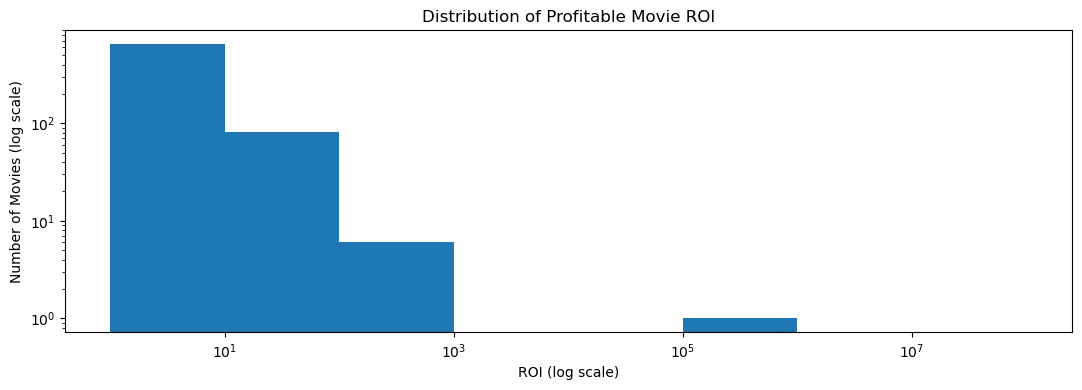

---------------------------------------------------------------------------
Cluster 3:
family, old, year, home, father, life, brother, son, young, new, mother, boy, 
 Cluster size: 353 movies 
 Mean ROI: 23.41 % 
 Standard deviation: 249.81 %


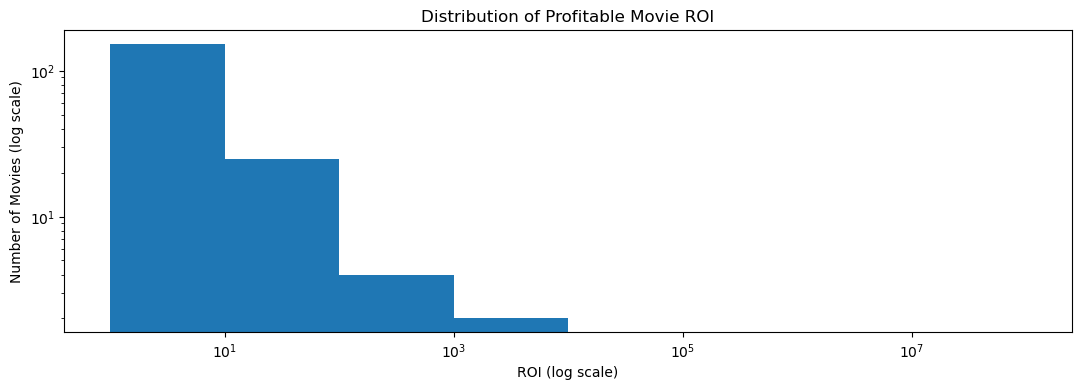

---------------------------------------------------------------------------
Cluster 4:
new, woman, york, city, young, life, love, husband, past, finds, mysterious, story, 
 Cluster size: 418 movies 
 Mean ROI: 20337.83 % 
 Standard deviation: 415250.79 %


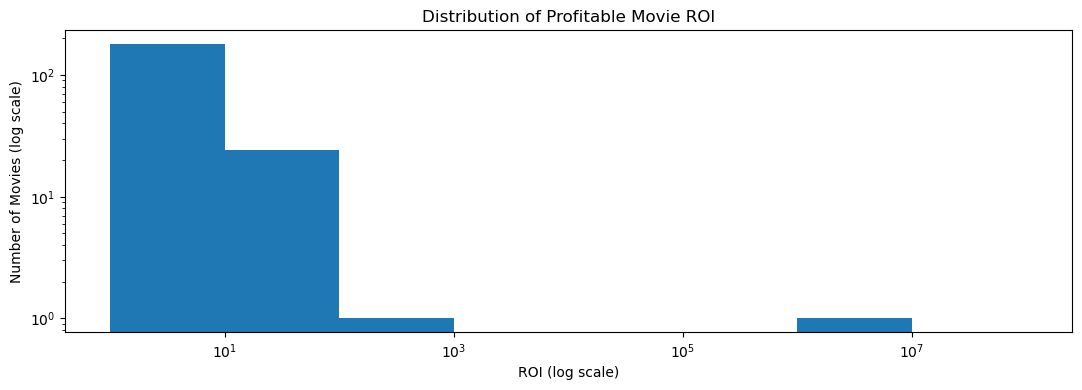

---------------------------------------------------------------------------
Cluster 5:
man, young, life, woman, love, story, family, wife, son, daughter, finds, falls, 
 Cluster size: 347 movies 
 Mean ROI: 3.32 % 
 Standard deviation: 9.92 %


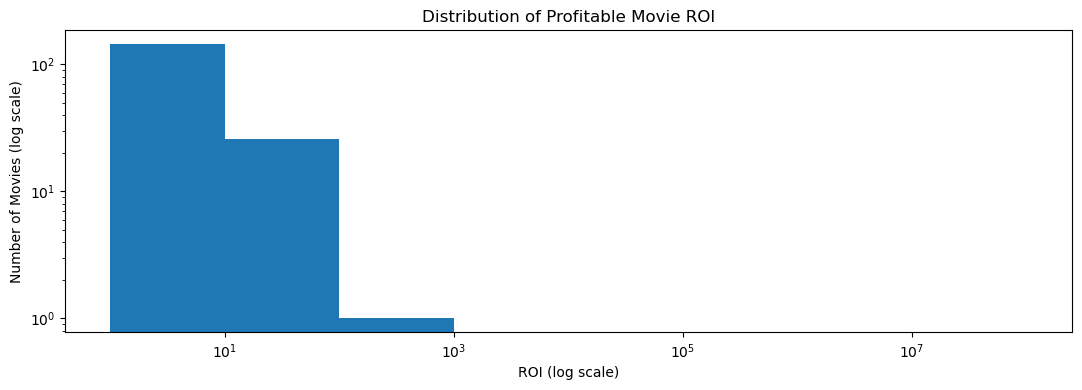

---------------------------------------------------------------------------
Cluster 6:
love, school, life, friends, high, girl, friend, best, father, years, falls, couple, 
 Cluster size: 881 movies 
 Mean ROI: 14128.52 % 
 Standard deviation: 417406.93 %


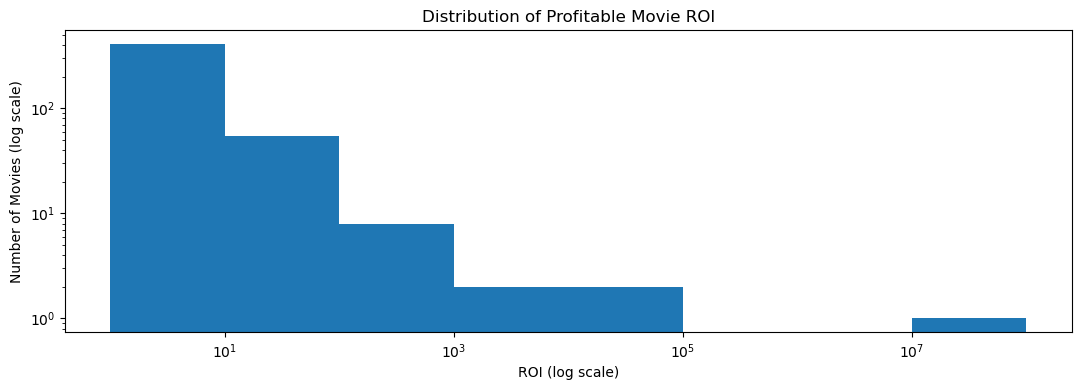

---------------------------------------------------------------------------
Cluster 7:
time, help, michael, stop, life, jamie, wife, old, father, new, just, gets, 
 Cluster size: 350 movies 
 Mean ROI: 10790.26 % 
 Standard deviation: 156662.25 %


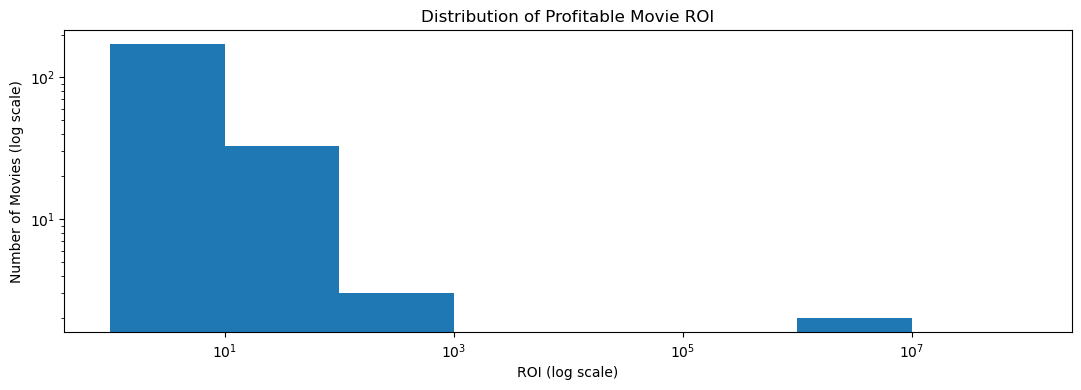

---------------------------------------------------------------------------
Cluster 8:
film, based, life, story, directed, love, follows, director, young, drama, classic, group, 
 Cluster size: 198 movies 
 Mean ROI: 5.85 % 
 Standard deviation: 21.37 %


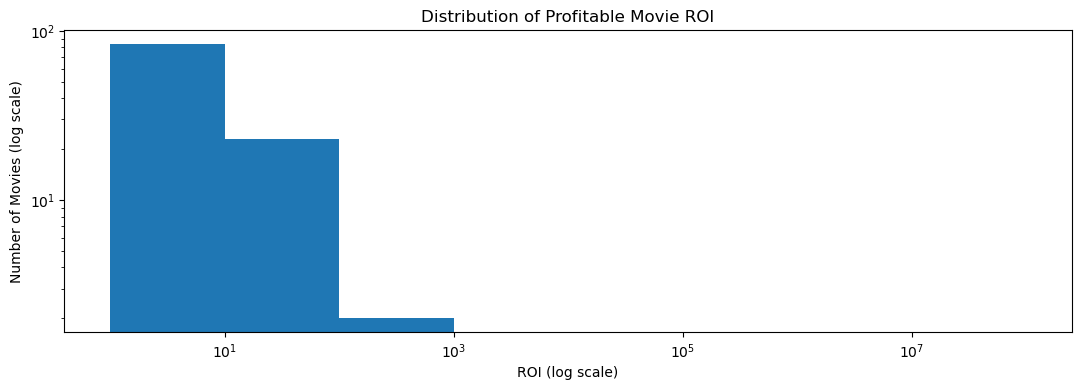

---------------------------------------------------------------------------
Cluster 9:
world, save, earth, life, planet, human, team, new, finds, young, set, evil, 
 Cluster size: 364 movies 
 Mean ROI: 2.98 % 
 Standard deviation: 12.25 %


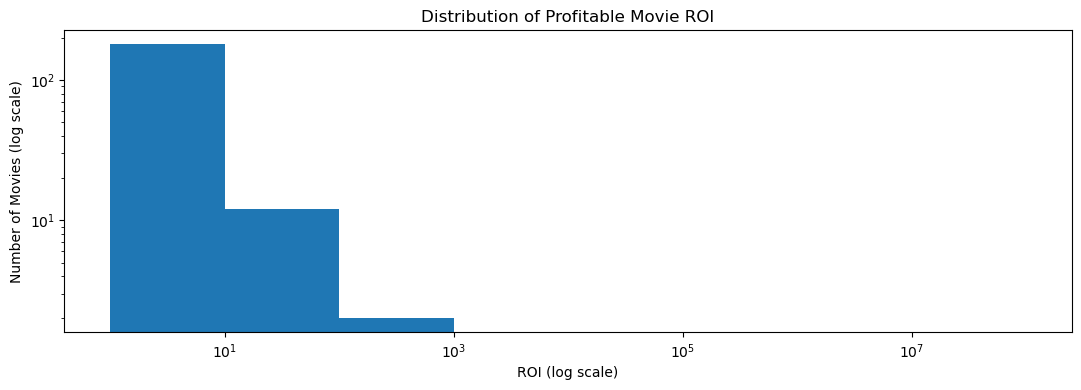

---------------------------------------------------------------------------
Cluster 10:
star, goes, movie, hollywood, danny, life, dream, young, wife, story, finds, wrong, 
 Cluster size: 255 movies 
 Mean ROI: 5.75 % 
 Standard deviation: 32.54 %


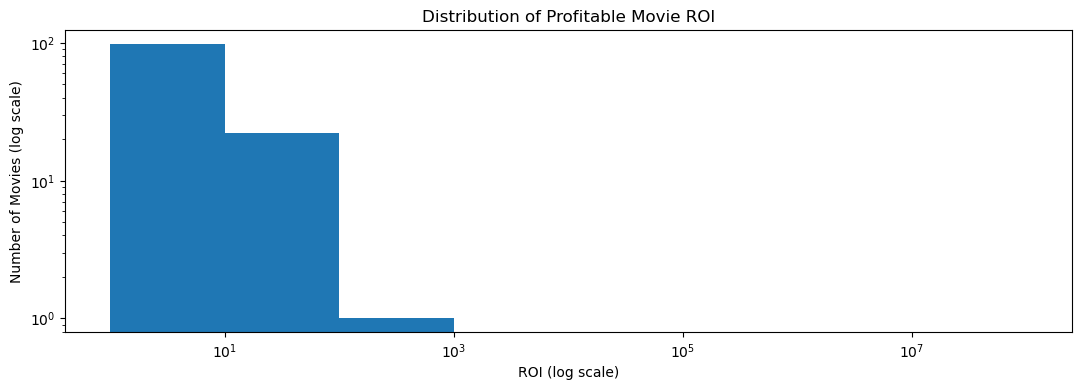

---------------------------------------------------------------------------
Cluster 11:
children, james, kids, bond, mike, business, child, house, father, soon, life, peter, 
 Cluster size: 225 movies 
 Mean ROI: 8.27 % 
 Standard deviation: 47.99 %


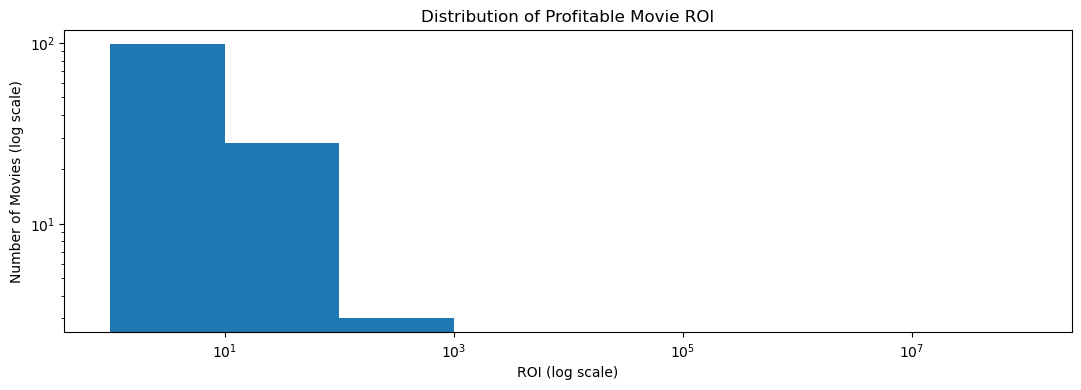

---------------------------------------------------------------------------
Cluster 12:
war, world, ii, american, vietnam, soldiers, civil, army, story, japanese, love, german, 
 Cluster size: 247 movies 
 Mean ROI: 16996.87 % 
 Standard deviation: 266537.59 %


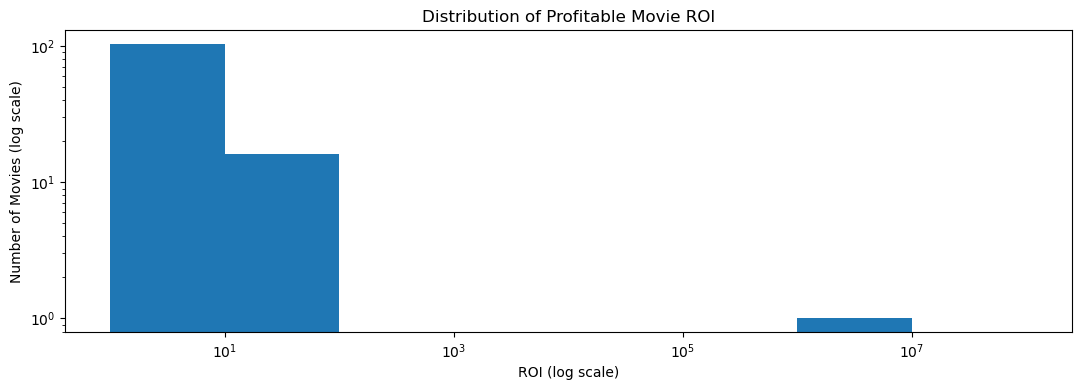

---------------------------------------------------------------------------


In [9]:
# Ouput centroids, statisitics and histogram for each cluster
print("Cluster Centroids and Statistics: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
cluster_run = []
for i in range(k):
    cluster_run.append(pd.read_csv('cluster{0}.csv'.format(i)))
i=1
for cluster in cluster_run:
    print("Cluster %d:" % i)
    # Print out 12 most common feature terms of each cluster
    for j in order_centroids[i-1, :12]: 
        print(terms[j], end =", ",)
    i=i+1
    # Calculate statistical summary of each cluster
    size = len(cluster)
    mean = np.mean(cluster['ROI'])
    std = np.std(cluster['ROI'])
    print("\n Cluster size:", size,
          "movies \n Mean ROI:", round(mean, 2), 
          "% \n Standard deviation:", round(std, 2), "%")
    # Histogram of ROI for profitable movies in each cluster
    plt.figure(figsize=(13, 4), dpi=100)
    bins = 10**(np.arange(0,9))
    plt.xscale('log')
    plt.yscale('log')
    plt.hist(cluster.ROI, bins = bins)
    plt.title("Distribution of Profitable Movie ROI")
    plt.xlabel("ROI (log scale)")
    plt.ylabel("Number of Movies (log scale)")
    plt.show()
    print('---------------------------------------------------------------------------')

In [10]:
# Run one-way ANOVA test
import scipy.stats as stats
cluster0 = pd.read_csv("cluster0.csv")
cluster1 = pd.read_csv("cluster1.csv")
cluster2 = pd.read_csv("cluster2.csv")
cluster3 = pd.read_csv("cluster3.csv")
cluster4 = pd.read_csv("cluster4.csv")
cluster5 = pd.read_csv("cluster5.csv")
cluster6 = pd.read_csv("cluster6.csv")
cluster7 = pd.read_csv("cluster7.csv")
cluster8 = pd.read_csv("cluster8.csv")
cluster9 = pd.read_csv("cluster9.csv")
cluster10 = pd.read_csv("cluster10.csv")
cluster11 = pd.read_csv("cluster11.csv")
stats.kruskal(cluster0['ROI'], cluster1['ROI'], cluster2['ROI'], cluster3['ROI'], cluster4['ROI'], 
               cluster5['ROI'], cluster6['ROI'], cluster7['ROI'], cluster8['ROI'], cluster9['ROI'], 
              cluster10['ROI'], cluster11['ROI'])

KruskalResult(statistic=38.57059721887048, pvalue=6.264986105180524e-05)